In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
df = pd.read_csv('insurance.csv')
df.drop('region',axis=1,inplace=True)
df.head(5)

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


<AxesSubplot:>

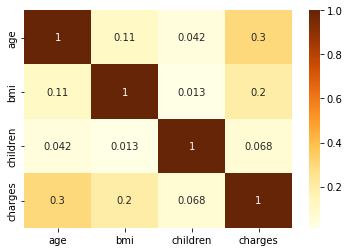

In [5]:
## Check for Pairwise corelation
sns.heatmap(df.corr(), annot = True, cmap = 'YlOrBr')

<AxesSubplot:xlabel='smoker', ylabel='count'>

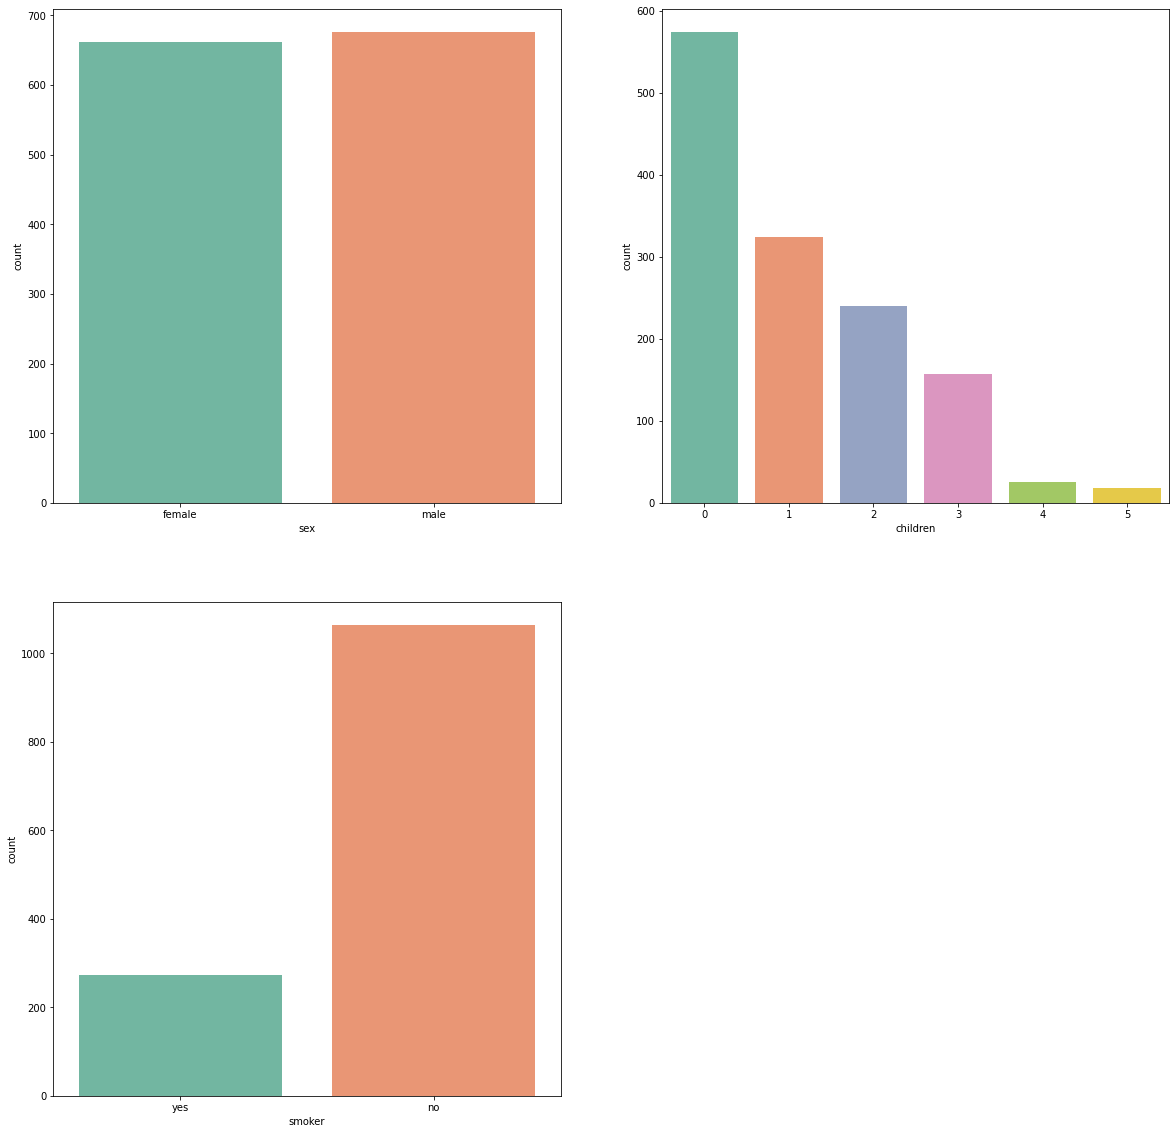

In [7]:
plt.figure(figsize = (20,20))

plt.subplot(2,2,1)
sns.countplot(x = 'sex', palette='Set2', data = df)

plt.subplot(2,2,2)
sns.countplot(x = 'children', palette='Set2', data = df)

plt.subplot(2,2,3)
sns.countplot(x = 'smoker', palette='Set2', data = df)

<b> Looking at the Categorical Variables and the corelation between the variable, number of children has a negligible impact on the overall charges</b>

<b> Bi-variate Analysis</b>

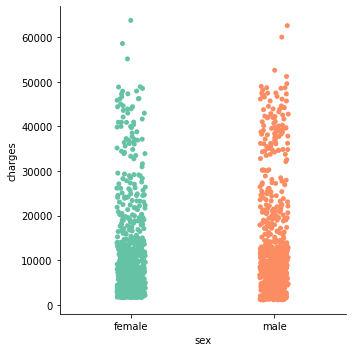

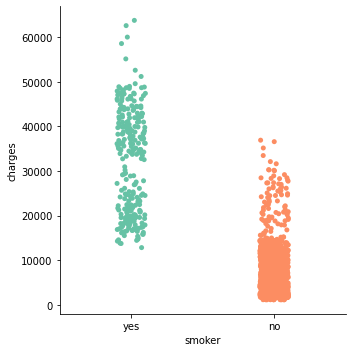

In [8]:
sns.catplot(x = "sex", y = "charges", palette = "Set2", data = df)

sns.catplot(x = "smoker", y = "charges", palette = "Set2", data = df)

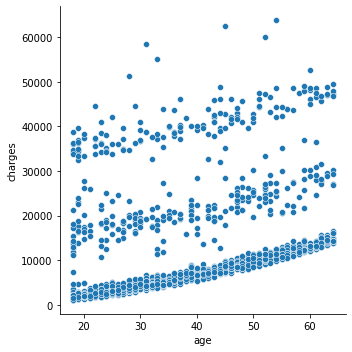

In [14]:
sns.relplot(x='age', y = 'charges' , data = df)

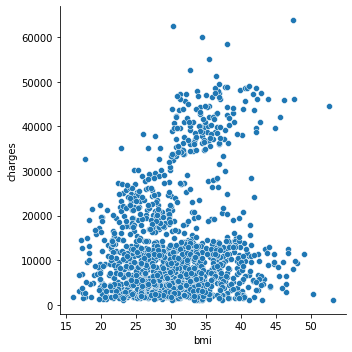

In [15]:
sns.relplot(x='bmi', y = 'charges' , data = df)

When we compare our variables with our target variable we can have some interesting insights, smokers have higher values than non-smokers, and when we look at the BMI we have a greater concentration of amounts paid between 30 and 40.

<b> Start building Machine Learning Models </b>

In [16]:
X = df.drop('charges',axis=1)
Y= df['charges']

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder_sex = LabelEncoder()
label_encoder_smoker = LabelEncoder()

In [20]:
X['sex'] = label_encoder_sex.fit_transform(X['sex'])
X['smoker'] = label_encoder_smoker.fit_transform(X['smoker'])

Train-Test Split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

<b> Decision Trees</b>

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['friedman_mse', 'poisson']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model = DecisionTreeRegressor()
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)

In [33]:
gridDecisionTree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['friedman_mse', 'poisson'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

In [35]:
GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': np.array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': np.array([2, 3, 4, 5, 6, 7])})

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

In [36]:
print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  2
Max Nvl:  3
Algorithm:  friedman_mse
Score:  0.8244342883930477


<b> Applying decision tree based on the best split results obtained from grid search</b>

In [37]:
decision_tree = DecisionTreeRegressor(min_samples_split = 2, max_depth = 3, criterion = 'friedman_mse')

In [38]:
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3)

In [41]:
lr_normal_decision_tree = decision_tree.score(X_train, y_train)

print("Accuracy on train set is: " + str(lr_normal_decision_tree))

lr_normal_decision_tree_test = decision_tree.score(X_test, y_test)
print("Accuracy on test set is: " + str(lr_normal_decision_tree_test))

Accuracy on train set is: 0.8419666316324129
Accuracy on test set is: 0.8751026719462079


<b> Random Forest Regressor </b>

In [42]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 100)

regressor_rf.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
lr_normal_rf = regressor_rf.score(X_train, y_train)

lr_normal_rf_test = regressor_rf.score(X_test, y_test)

print("Accuracy on train set is: " + str(lr_normal_rf))
print("Accuracy on test set is: " + str(lr_normal_rf_test))

Accuracy on train set is: 0.9726840728176037
Accuracy on test set is: 0.8563116565999174


<b> Error Checks </b>

In [48]:
decision_tree_error = decision_tree.predict(X_test)
mse_lr_normal_decision_tree  = mean_absolute_error(y_test, decision_tree_error)
rmse_lr_normal_decision_tree = np.sqrt(mean_squared_error(y_test, decision_tree_error))

In [51]:
random_forest_error = regressor_rf.predict(X_test)
mse_lr_normal_random_forest  = mean_absolute_error(y_test, random_forest_error)
rmse_lr_normal_random_forest = np.sqrt(mean_squared_error(y_test, random_forest_error))

In [52]:
decision_tree = {'Model':'Decision Tree',
               'Score Train':lr_normal_decision_tree,
               'Score Test':lr_normal_decision_tree_test,
               'MSE':mse_lr_normal_decision_tree,
               'RMSE':rmse_lr_normal_decision_tree,}

random_forest = {'Model':'Random Forest',
               'Score Train':lr_normal_rf,
               'Score Test':lr_normal_rf_test,
               'MSE':mse_lr_normal_random_forest,
               'RMSE':rmse_lr_normal_random_forest,}

result = pd.DataFrame({
                       'Decision Tree':pd.Series(decision_tree),
                       'Random Forest':pd.Series(random_forest),
                      
                      })
result

,Decision Tree,Random Forest
Model,Decision Tree,Random Forest
Score Train,0.841967,0.972684
Score Test,0.875103,0.856312
MSE,2717.518627,2738.391867
RMSE,4462.881367,4786.846902
